In [1]:
def Euler(f, h, y0, t0, tEnd):
    y = y0
    solution = [(t0, y0)]
    
    for t in srange(t0, tEnd, h):
        y = N(y + h * f(t, y))
        # Update t-value, restrict digits to prevent floating point inaccuracies from accumulating
        t = N(t+h, digits=4)
        solution.append((t, y))
        
    return solution

In [2]:
def Heun(f, h, y0, t0, tEnd):
    y = y0
    solution = [(t0, y0)]
    
    for t in srange(t0, tEnd, h):
        k1 = f(t, y)
        k2 = f (t + (2/3)*h, y + (2/3)*h*f(t,y))
        y = N(y + (h/4)*(k1 + 3 * k2))
        # Update t-value, restrict digits to prevent floating point inaccuracies from accumulating
        t = N(t+h, digits=4)
        solution.append((t, y))
        
    return solution

In [3]:
def Graph(approxSolution, exactSolution, t0, tEnd, title):
    exactPlot = plot(exactSolution, t0, tEnd, rgbcolor = 'blue') # Exact plot
    approxPlot= list_plot(approxSolution, plotjoined=False, color='red'); # Discrete approximation plot
    show(exactPlot + approxPlot, title = title)

In [4]:
# Set up ODE
t = var('t')
y = function('y')(t)
f(t, y) = (2*pi*sin(2*pi*t) - 2*t*y) / (2 + t^2)
t0 = 0.0 # ICs setup as floating point so that results can be printed at select t values correctly
y0 = 0.0

tEnd = 5

In [5]:
# Verify exact solution
y = function('y')(t)

DE = diff(y, t) - f(t, y)
exactSolution = desolve(DE, [y, t], ics=[t0, y0])
print(exactSolution)

-(cos(2*pi*t) - 1)/(t^2 + 2)


/usr/lib/python3/dist-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/usr/lib/python3/dist-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


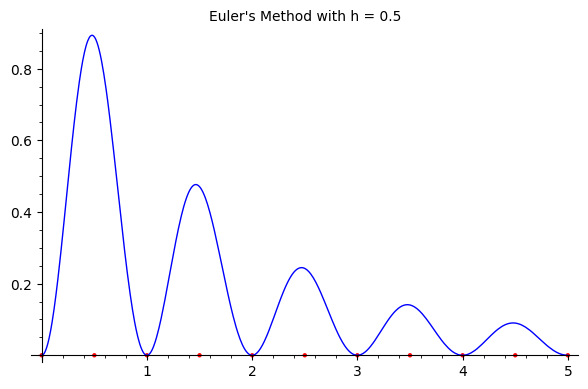

0.000000000000000 0.000000000000000
1.000 1.70992950553048e-16
2.000 1.79374957933099e-16
3.000 1.37752787952966e-16
4.000 1.06257840499263e-16
5.000 8.51429616453285e-17


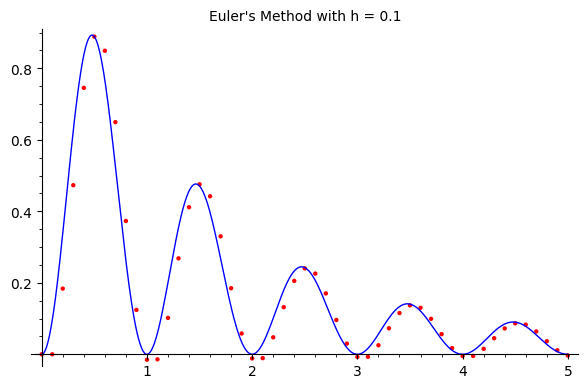

0.000000000000000 0.000000000000000
1.000 -0.0152563855194728
2.000 -0.0116395877363361
3.000 -0.00735253401530324
4.000 -0.00481864536307149
5.000 -0.00334384098657789


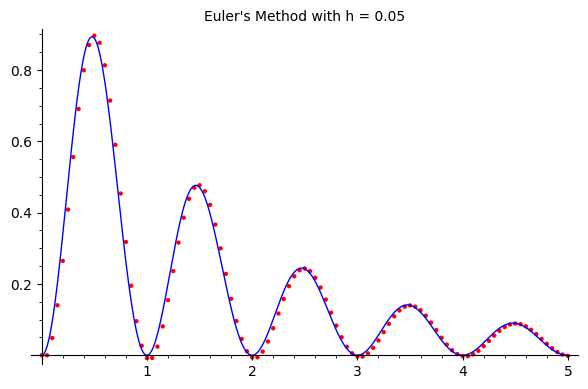

0.000000000000000 0.000000000000000
1.000 -0.00754307783309228
2.000 -0.00577936719977220
3.000 -0.00368647572452753
4.000 -0.00243411313587793
5.000 -0.00169811428130385


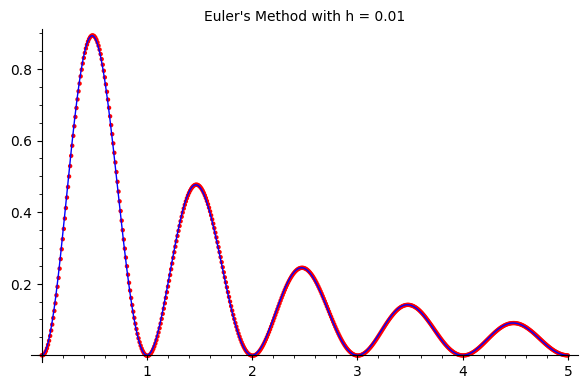

0.000000000000000 0.000000000000000
1.000 -0.00147893306096389
2.000 -0.00113665485178099
3.000 -0.000730403117901461
4.000 -0.000485038350808880
5.000 -0.000339769319735857


In [6]:
# Produce Euler results
step_values = [0.5, 0.1, 0.05, 0.01]
results = []
for h in step_values:
    result = Euler(f, h, y0, t0, tEnd)
    results.append(result)
    Graph(result, exactSolution, t0, tEnd, 'Euler\'s Method with h = ' + h.str(truncate=True, skip_zeroes=True))
    for (tn, yn) in result:
        # Only print results for integer t values
        # Since t is stored as a floating point, find t with very small component after decimal point
        # to account for any floating point inaccuracies that may occur
        if abs(tn - tn.integer_part()) < 0.0001:
            print(tn, yn)

In [7]:
# Absolute Local Truncation Error
step_values = [0.1, 0.01, 0.001, 0.0001]
solutions = []
LTEs = []
for step in step_values:
    solutions.append(Euler(f, step, y0, t0, 2.5))
    
for sol, step_value in zip(solutions, step_values):
    print(step_value, ":", abs(sol[1][1] - N(exactSolution(step_value))))
    LTEs.append(abs(sol[1][1] - N(exactSolution(step_value))))
    
        
for i in range(1, len(LTEs)):
    ratio = LTEs[i - 1] / LTEs[i]
    print(ratio)

0.100000000000000 : 0.0950164207089814
0.0100000000000000 : 0.000986586456541372
0.00100000000000000 : 9.86956699666752e-6
0.000100000000000000 : 9.86960402848958e-8
96.3082556819965
99.9624863861297
99.9996247891816


In [8]:
# Relative Global Error
y_exact = N(exactSolution(2.5))
print(2.5, y_exact)
RGEs = []
for sol, step_value in zip(solutions, step_values):
    # Solutions ended at t = 2.5, take last tuple to get y at this t value
    y_m = sol[-1][1]
            
    RGE = abs((y_m - y_exact) / y_exact)
    RGEs.append(RGE)
    print(step_value, y_m, RGE)
    
for i in range(1, len(RGEs)):
    ratio = RGEs[i - 1] / RGEs[i]
    print(ratio)

2.50000000000000 0.242424242424242
0.100000000000000 0.240315188689139 0.00869984665730082
0.0100000000000000 0.242915203703322 0.00202521527620326
0.00100000000000000 0.242480142973669 0.000230589766385122
0.000100000000000000 0.242429900369730 0.0000233390251373686
4.29576389212841
8.78276303390161
9.88000848484113


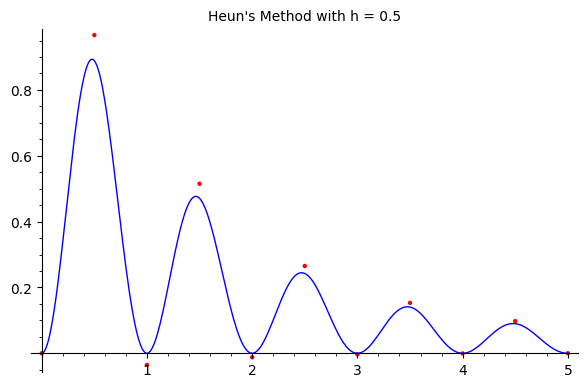

0.000000000000000 0.000000000000000
1.000 -0.0354296131917701
2.000 -0.0120951690028893
3.000 -0.00320519831671598
4.000 -0.000540203269641715
5.000 0.000276274404795579


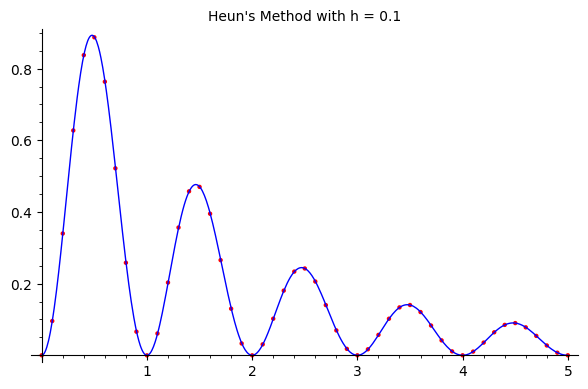

0.000000000000000 0.000000000000000
1.000 -0.000230315420681297
2.000 -0.000112322040943979
3.000 -0.0000475827544748845
4.000 -0.0000223345800819379
5.000 -0.0000116502939609148


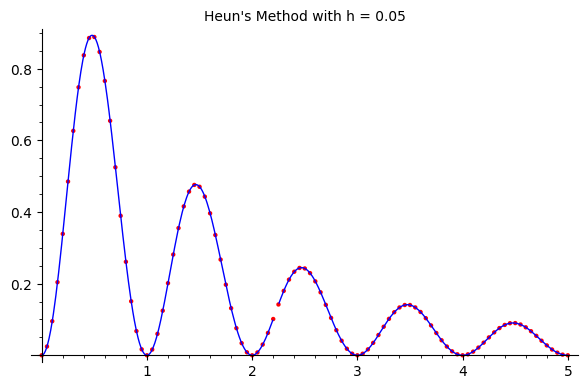

0.000000000000000 0.000000000000000
1.000 -0.0000285928116730196
2.000 -0.0000142648733200386
3.000 -6.19459203318263e-6
4.000 -2.98409058485227e-6
5.000 -1.60024001504726e-6


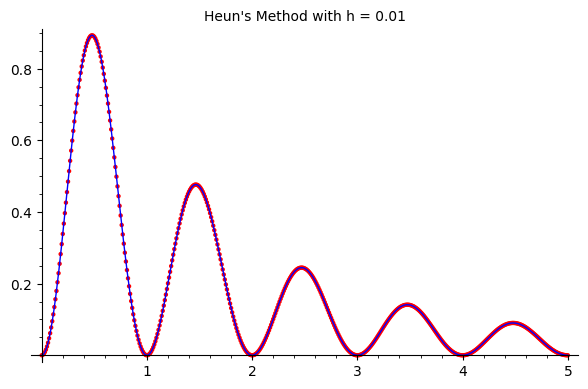

0.000000000000000 0.000000000000000
1.000 -2.28452906112907e-7
2.000 -1.15869350078871e-7
3.000 -5.12453849923312e-8
4.000 -2.51478432285388e-8
5.000 -1.37432086580019e-8


In [9]:
# Produce Heun results
step_values = [0.5, 0.1, 0.05, 0.01]
for h in step_values:
    result = Heun(f, h, y0, t0, tEnd)
    Graph(result, exactSolution, t0, tEnd, 'Heun\'s Method with h = ' + h.str(truncate=True, skip_zeroes=True))
    for (tn, yn) in result:
        # Only print results for integer t values
        # Since t is stored as a floating point, find t with very small component after decimal point
        if abs(tn - tn.integer_part()) < 0.0001:
            print(tn, yn)

In [10]:
# Absolute Local Truncation Error
step_values = [0.1, 0.01, 0.001, 0.0001]
solutions = []
LTEs = []
for step in step_values:
    solutions.append(Heun(f, step, y0, t0, 2.5))
    
for sol, step_value in zip(solutions, step_values):
    print(step_value, ":", abs(sol[1][1] - N(exactSolution(step_value))))
    LTEs.append(abs(sol[1][1] - N(exactSolution(step_value))))   
        
for i in range(1, len(LTEs)):
    ratio = LTEs[i - 1] / LTEs[i]
    print(ratio)

0.100000000000000 : 0.000606148430384243
0.0100000000000000 : 6.34638042695292e-8
0.00100000000000000 : 6.34925573454856e-12
0.000100000000000000 : 6.20478050703817e-16
9551.08880346892
9995.47142576098
10232.8450254550


In [11]:
# Relative Global Error
y_exact = N(exactSolution(2.5))
print(2.5, y_exact)
RGEs = []

for sol, step_value in zip(solutions, step_values):
    # Solutions ended at t = 2.5, take last tuple to get y at this t value
    y_m = sol[-1][1]
            
    RGE = abs((y_m - y_exact) / y_exact)
    RGEs.append(RGE)
    print(step_value, y_m, RGE)
    
for i in range(1, len(RGEs)):
    ratio = RGEs[i - 1] / RGEs[i]
    print(ratio)

2.50000000000000 0.242424242424242
0.100000000000000 0.242273701022815 0.000620983280890067
0.0100000000000000 0.242421856190575 9.84321387727249e-6
0.00100000000000000 0.242424217864142 1.01310415515088e-7
0.000100000000000000 0.242424242177384 1.01829145116028e-9
63.0874517848167
97.1589527811834
99.4905882786809
